In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/home/diablo/Desktop/IIIT_Program/Module2 - Main EDA /Bivariate Analysis/EDA_Gold_Silver_prices.csv")
df.head()

,Month,SilverPrice,GoldPrice
0,Mar-97,186.48,12619.24
1,Apr-97,170.65,12338.59
2,May-97,170.44,12314.94
3,Jun-97,169.96,12202.78
4,Jul-97,155.80,11582.07


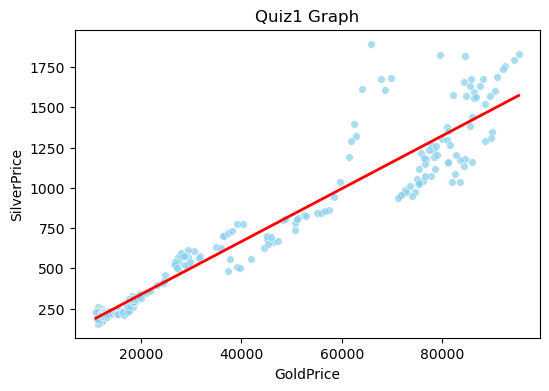

In [15]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="GoldPrice", y="SilverPrice", color="skyblue", s=30, alpha=0.7)
plt.title("Quiz1 Graph")
plt.xlabel("Gold Price")
plt.ylabel("Silver Price")
sns.regplot(data=df, x="GoldPrice", y="SilverPrice",
            scatter=False,          # turn off second set of dots
            color="red",            # line colour
            ci=None,                # hide 95 % confidence band
            line_kws={"lw": 2})     # line style/width

plt.show()

In [17]:
print(round(df["GoldPrice"].corr(df["SilverPrice"]),2))

0.95


In [18]:
df.shape

(241, 3)

In [19]:
df["Month"] = pd.to_datetime(df["Month"], format="%b-%y")   # Mar-97 → 1997-03-01
df["Year"]  = df["Month"].dt.year                           # extract numeric year

# ── 3.  Filter rows for the year 2008  ───────────────────────
df_2008 = df.loc[df["Year"] == 2008, ["GoldPrice", "SilverPrice"]]

# Make sure you actually have 2008 data
if df_2008.empty:
    raise ValueError("No rows found for 2008; check the Month format or data source.")

# ── 4.  Calculate Pearson correlation  ───────────────────────
corr_2008 = df_2008.corr().iloc[0, 1]        # off-diagonal element

print(f"Gold–silver correlation in 2008: {corr_2008:.3f}")

Gold–silver correlation in 2008: 0.010
